In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## RandomForestRegressor

In [9]:
normal_data = pd.read_excel('/content/Normaldata.xlsx')
print(normal_data.head())

        Date       Temp      Humid      Solar  WindDirection  WindSpeed  \
0 2023-04-01  28.653553  82.180540  26.769742     186.417002   0.095625   
1 2023-04-02  28.658736  82.480924  28.353674     228.372874   0.104963   
2 2023-04-03  28.390300  82.618162  27.550716     160.451967   0.197348   
3 2023-04-04  29.252714  81.864107  29.122690     181.657631   0.485500   
4 2023-04-05  29.630009  82.474399  27.940352     170.464190   0.729902   

   RainFall  Interpolation  
0  0.000000            155  
1  0.000000            155  
2  0.000000            155  
3  0.008333            150  
4  0.000000            140  


In [10]:
normal_data['Date'] = pd.to_datetime(normal_data['Date'])

In [11]:
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           183 non-null    datetime64[ns]
 1   Temp           183 non-null    float64       
 2   Humid          183 non-null    float64       
 3   Solar          183 non-null    float64       
 4   WindDirection  183 non-null    float64       
 5   WindSpeed      183 non-null    float64       
 6   RainFall       183 non-null    float64       
 7   Interpolation  183 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 11.6 KB


In [12]:
normal_data.duplicated().sum()

0

In [13]:
normal_data.isna().sum()

,0
Date,0
Temp,0
Humid,0
Solar,0
WindDirection,0
WindSpeed,0
RainFall,0
Interpolation,0


In [14]:
normal_data.describe()

,Date,Temp,Humid,Solar,WindDirection,WindSpeed,RainFall,Interpolation
count,183,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2023-10-31 16:00:00,29.036752,83.681278,23.113518,188.633442,0.671741,0.104987,186.333333
min,2023-04-01 00:00:00,23.460994,67.139841,5.114063,96.995356,0.000000,0.000000,130.000000
25%,2023-05-16 12:00:00,28.413719,81.537567,19.525943,162.751573,0.307941,0.000000,155.000000
50%,2024-03-01 00:00:00,28.774030,83.473280,23.479860,183.574303,0.556011,0.008333,180.000000
75%,2024-04-15 12:00:00,29.871110,86.320313,27.533689,210.157666,1.037661,0.109760,205.500000
max,2024-05-31 00:00:00,31.883557,91.644745,43.384801,281.041017,1.772988,2.400000,270.000000
std,NaN,1.179029,3.300572,5.894067,38.103231,0.494831,0.267122,39.094607


In [15]:
normal_durian_price = normal_data["Interpolation"]
print(normal_durian_price)

0      155
1      155
2      155
3      150
4      140
      ... 
178    180
179    180
180    180
181    180
182    180
Name: Interpolation, Length: 183, dtype: int64


In [16]:
normal_scaler = MinMaxScaler()
normal_data_scaled = normal_scaler.fit_transform(normal_data.iloc[:,1:])
X = normal_data_scaled[:, :-1]
y = normal_data_scaled[:, -1]   # ตัวแปรตาม (ราคาทุเรียน)

# แบ่งข้อมูลสำหรับ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แสดงผลการแบ่งข้อมูล
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 146 samples
Test set size: 37 samples


R-squared of train set: 0.9067978547503657
R-squared of test set: 0.4023920467340417
Mean Squared Error: 0.05526646387203526


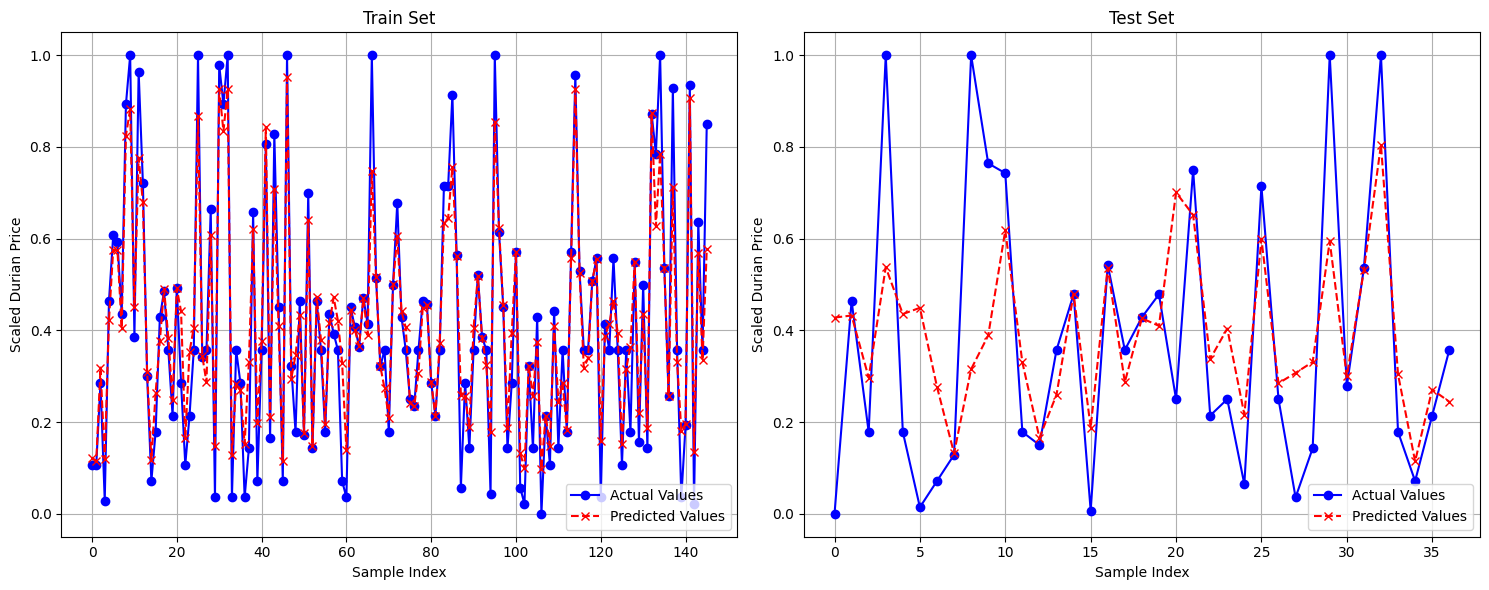

In [17]:
# สร้างโมเดล
normal_model = RandomForestRegressor(n_estimators=100, random_state=50)
normal_model.fit(X_train, y_train)

# ทำนายผล
y_pred = normal_model.predict(X_test)

# คำนวณค่า R-squared ของชุดฝึกสอน
y_train_pred = normal_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-squared of train set:", r2_train)

# ประเมินโมเดล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared of test set: {r2}")
print(f"Mean Squared Error: {mse}")

# สร้างกราฟเปรียบเทียบแบบ subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# สร้างกราฟเปรียบเทียบ y_train และ y_train_pred
ax1.plot(y_train, label="Actual Values", marker='o', linestyle='-', color='blue')
ax1.plot(y_train_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax1.set_title("Train Set")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Scaled Durian Price")
ax1.legend(loc='lower right')
ax1.grid(True)

# สร้างกราฟเปรียบเทียบ y_test และ y_pred
ax2.plot(y_test, label="Actual Values", marker='o', linestyle='-', color='blue')
ax2.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax2.set_title("Test Set")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Scaled Durian Price")
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# ข้อมูล min และ max ของตัวแปรเป้าหมาย (y_train)
y_min = normal_durian_price.min()
y_max = normal_durian_price.max()

# แปลงค่ากลับจาก Min-Max Scaled เป็นค่าจริง
y_pred_original = y_pred * (y_max - y_min) + y_min
y_test_original = y_test * (y_max - y_min) + y_min

In [19]:
# แสดงผลลัพธ์ที่แปลงกลับ
df_compare = pd.DataFrame({'y_test': y_test_original, 'y_pred': y_pred_original})

# แสดงผล DataFrame
print(df_compare)

    y_test  y_pred
0    130.0  189.91
1    195.0  190.54
2    155.0  171.60
3    270.0  205.30
4    155.0  190.98
5    132.0  192.90
6    140.0  168.78
7    148.0  148.49
8    270.0  174.17
9    237.0  184.44
10   234.0  216.51
11   155.0  176.25
12   151.0  153.20
13   180.0  166.35
14   197.0  197.12
15   131.0  156.34
16   206.0  205.15
17   180.0  170.19
18   190.0  189.70
19   197.0  187.37
20   165.0  228.12
21   235.0  221.23
22   160.0  177.27
23   165.0  186.55
24   139.0  160.30
25   230.0  213.93
26   165.0  169.85
27   135.0  173.03
28   150.0  176.34
29   270.0  213.21
30   169.0  171.93
31   205.0  204.34
32   270.0  242.67
33   155.0  172.57
34   140.0  146.03
35   160.0  167.94
36   180.0  164.22


In [20]:
# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds, shuffle data
r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    first_model = RandomForestRegressor(n_estimators=100, random_state=50)
    first_model.fit(X_train, y_train)
    y_pred = first_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)

print("R-squared scores for each fold:", r2_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("MSE scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

R-squared scores for each fold: [0.23012066091384764, 0.5785908280396019, 0.6177464346653896, 0.34390501412066743, 0.49556292460235485, 0.12004513667681771, 0.38481321053017303, 0.22615031187561374, 0.3584239918907792, 0.38262283624419746]
Mean R-squared: 0.3737981349559443
MSE scores for each fold: [0.07469688023630502, 0.03652721052631578, 0.030458298603651984, 0.07243452295918368, 0.03845395379818593, 0.03762824121315193, 0.027757126417233564, 0.048059497165532955, 0.028704525226757358, 0.06416973752834466]
Mean MSE: 0.045888999367466286


## Random Forest Regressor Use Average 120 Day Before

In [21]:
data = pd.read_excel('/content/AVG120Data.xlsx')
print(data.head())

        Date       Temp      Humid      Solar  WindDirection  WindSpeed  \
0 2023-04-01  26.024855  75.628289  26.637970     123.236394   0.432988   
1 2023-04-02  26.064696  75.692429  26.649248     124.324159   0.427747   
2 2023-04-03  26.102300  75.757712  26.653835     124.845916   0.423277   
3 2023-04-04  26.147091  75.816712  26.671522     125.544387   0.421208   
4 2023-04-05  26.195026  75.880798  26.679355     126.149580   0.421175   

   RainFall  Interpolation  
0  0.026181            155  
1  0.026181            155  
2  0.026181            155  
3  0.026250            150  
4  0.026250            140  


In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           183 non-null    datetime64[ns]
 1   Temp           183 non-null    float64       
 2   Humid          183 non-null    float64       
 3   Solar          183 non-null    float64       
 4   WindDirection  183 non-null    float64       
 5   WindSpeed      183 non-null    float64       
 6   RainFall       183 non-null    float64       
 7   Interpolation  183 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 11.6 KB


In [ ]:
data.duplicated().sum()

0

In [24]:
data.isna().sum()

,0
Date,0
Temp,0
Humid,0
Solar,0
WindDirection,0
WindSpeed,0
RainFall,0
Interpolation,0


In [25]:
data.describe()

,Date,Temp,Humid,Solar,WindDirection,WindSpeed,RainFall,Interpolation
count,183,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2023-10-31 16:00:00,27.771524,81.243499,23.675079,149.561659,0.622451,0.059368,186.333333
min,2023-04-01 00:00:00,26.024855,75.628289,20.139212,123.236394,0.357786,0.007377,130.000000
25%,2023-05-16 12:00:00,27.233304,79.126171,22.089995,140.616846,0.417186,0.047283,155.000000
50%,2024-03-01 00:00:00,27.763603,81.992773,23.917086,148.266817,0.494201,0.059243,180.000000
75%,2024-04-15 12:00:00,28.309354,83.306325,25.979789,157.862642,0.893749,0.077192,205.500000
max,2024-05-31 00:00:00,29.121639,84.829068,26.681187,173.134756,1.105020,0.085178,270.000000
std,NaN,0.742667,2.654952,2.291644,12.501864,0.245499,0.018184,39.094607


In [26]:
durian_price = data["Interpolation"]
print(durian_price)

0      155
1      155
2      155
3      150
4      140
      ... 
178    180
179    180
180    180
181    180
182    180
Name: Interpolation, Length: 183, dtype: int64


In [27]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.iloc[:,1:])
X = data_scaled[:, :-1]
y = data_scaled[:, -1]   # ตัวแปรตาม (ราคาทุเรียน)

# แบ่งข้อมูลสำหรับ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แสดงผลการแบ่งข้อมูล
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 146 samples
Test set size: 37 samples


R-squared of train set: 0.9962591471170239
R-squared of test set: 0.9881535663480083
Mean Squared Error: 0.0010955518477661341


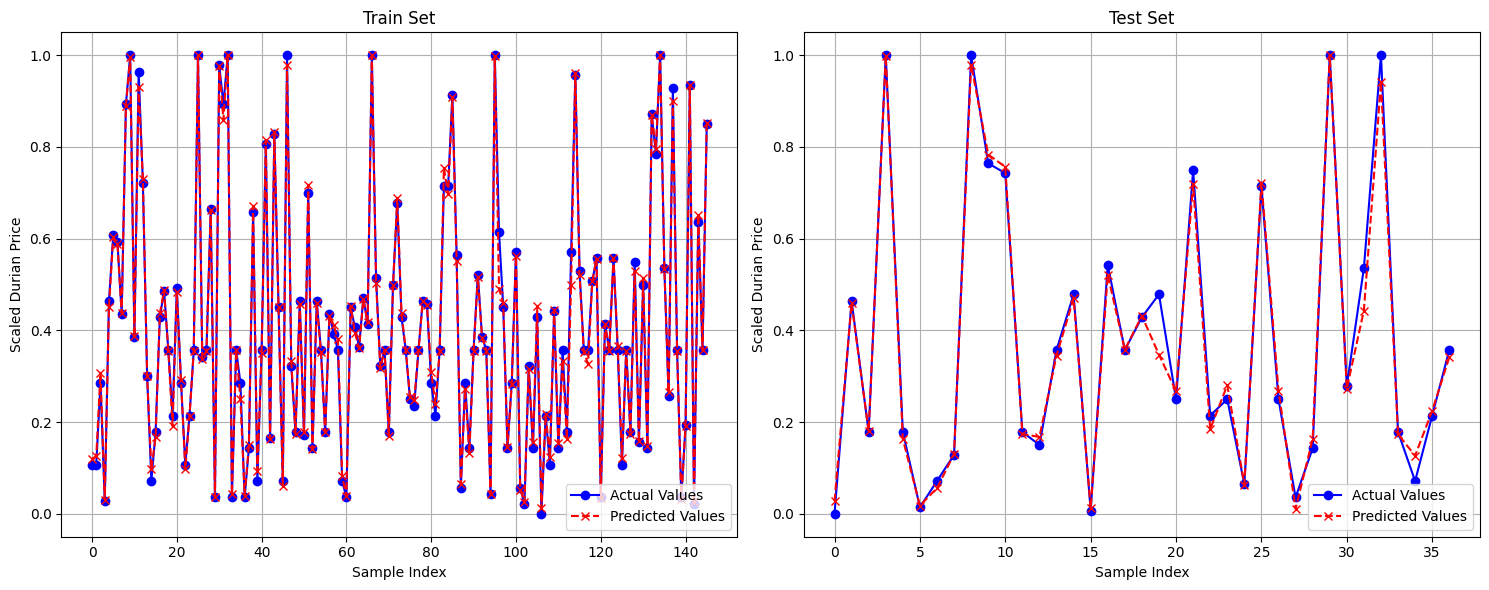

In [28]:
# สร้างโมเดล
model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# คำนวณค่า R-squared ของชุดฝึกสอน
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-squared of train set:", r2_train)

# ประเมินโมเดล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared of test set: {r2}")
print(f"Mean Squared Error: {mse}")

# สร้างกราฟเปรียบเทียบแบบ subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# สร้างกราฟเปรียบเทียบ y_train และ y_train_pred
ax1.plot(y_train, label="Actual Values", marker='o', linestyle='-', color='blue')
ax1.plot(y_train_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax1.set_title("Train Set")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Scaled Durian Price")
ax1.legend(loc='lower right')
ax1.grid(True)

# สร้างกราฟเปรียบเทียบ y_test และ y_pred
ax2.plot(y_test, label="Actual Values", marker='o', linestyle='-', color='blue')
ax2.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax2.set_title("Test Set")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Scaled Durian Price")
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [29]:
# ข้อมูล min และ max ของตัวแปรเป้าหมาย (y_train)
y_min = durian_price.min()
y_max = durian_price.max()

# แปลงค่ากลับจาก Min-Max Scaled เป็นค่าจริง
y_pred_original = y_pred * (y_max - y_min) + y_min
y_test_original = y_test * (y_max - y_min) + y_min

In [30]:
# แสดงผลลัพธ์ที่แปลงกลับ
df_compare = pd.DataFrame({'y_test': y_test_original, 'y_pred': y_pred_original})

# แสดงผล DataFrame
print(df_compare)

    y_test  y_pred
0    130.0  133.84
1    195.0  194.28
2    155.0  155.15
3    270.0  269.85
4    155.0  152.84
5    132.0  132.49
6    140.0  137.85
7    148.0  148.24
8    270.0  267.14
9    237.0  239.70
10   234.0  235.92
11   155.0  154.35
12   151.0  153.47
13   180.0  178.33
14   197.0  195.74
15   131.0  131.63
16   206.0  202.94
17   180.0  180.14
18   190.0  190.42
19   197.0  178.62
20   165.0  167.40
21   235.0  230.56
22   160.0  155.83
23   165.0  169.27
24   139.0  138.93
25   230.0  231.11
26   165.0  167.64
27   135.0  131.51
28   150.0  152.82
29   270.0  270.00
30   169.0  168.20
31   205.0  192.07
32   270.0  261.83
33   155.0  154.27
34   140.0  147.74
35   160.0  161.47
36   180.0  177.73


In [31]:
# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds, shuffle data
r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    first_model = RandomForestRegressor(n_estimators=100, random_state=50)
    first_model.fit(X_train, y_train)
    y_pred = first_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)

print("R-squared scores for each fold:", r2_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("MSE scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

R-squared scores for each fold: [0.9976627257816415, 0.9774922443029883, 0.9875640974476312, 0.9882226854942233, 0.9920321239413346, 0.9740296973334854, 0.9675091358989838, 0.8630892719859632, 0.9838872818271089, 0.9903038845188893]
Mean R-squared: 0.972179314853225
MSE scores for each fold: [0.00022677201933404812, 0.0019509436090225597, 0.0009909035982814207, 0.0013002448979591843, 0.0006074024943310601, 0.0011105306122449002, 0.001465982426303865, 0.008502763321995456, 0.0007208934240362805, 0.0010078072562358278]
Mean MSE: 0.00178842436597446


## Random Forest Regressor Use Average 90 Day Before to Predict future 30 Day ago

In [32]:
data90 = pd.read_excel('/content/SMA90Data.xlsx')
print(data90.head())

        Date       Temp      Humid      Solar  WindDirection  WindSpeed  \
0 2023-04-01  25.383719  74.784134  25.315823     111.145516   0.508790   
1 2023-04-02  25.424981  74.784134  25.394210     111.068108   0.506895   
2 2023-04-03  25.466454  74.784134  25.471755     110.982953   0.503588   
3 2023-04-04  25.508137  74.784134  25.548458     111.061160   0.501422   
4 2023-04-05  25.550032  74.784134  25.624319     111.058091   0.497036   

   RainFall  Interpolation  
0  0.027222            155  
1  0.027222            155  
2  0.027222            155  
3  0.027222            150  
4  0.027222            140  


In [33]:
data90['Date'] = pd.to_datetime(data90['Date'])

In [34]:
data90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           183 non-null    datetime64[ns]
 1   Temp           183 non-null    float64       
 2   Humid          183 non-null    float64       
 3   Solar          183 non-null    float64       
 4   WindDirection  183 non-null    float64       
 5   WindSpeed      183 non-null    float64       
 6   RainFall       183 non-null    float64       
 7   Interpolation  183 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 11.6 KB


In [35]:
data90.duplicated().sum()

0

In [36]:
data90.isna().sum()

,0
Date,0
Temp,0
Humid,0
Solar,0
WindDirection,0
WindSpeed,0
RainFall,0
Interpolation,0


In [37]:
data90.describe()

,Date,Temp,Humid,Solar,WindDirection,WindSpeed,RainFall,Interpolation
count,183,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2023-10-31 16:00:00,27.382610,78.289572,24.356635,149.489875,0.682042,0.025553,186.333333
min,2023-04-01 00:00:00,25.383719,74.784134,20.313881,110.982953,0.305586,0.000926,130.000000
25%,2023-05-16 12:00:00,26.789732,77.281263,21.002336,131.096647,0.376969,0.009849,155.000000
50%,2024-03-01 00:00:00,27.277879,78.544430,25.471755,148.135133,0.698495,0.011979,180.000000
75%,2024-04-15 12:00:00,28.085848,79.389491,26.684068,161.946986,0.912980,0.034907,205.500000
max,2024-05-31 00:00:00,29.139407,82.533893,27.392986,200.155539,1.327418,0.069027,270.000000
std,NaN,0.872170,1.948043,2.555568,23.666137,0.326146,0.020582,39.094607


In [38]:
durian_price = data90["Interpolation"]
print(durian_price)

0      155
1      155
2      155
3      150
4      140
      ... 
178    180
179    180
180    180
181    180
182    180
Name: Interpolation, Length: 183, dtype: int64


In [39]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data90.iloc[:,1:])
X = data_scaled[:, :-1]
y = data_scaled[:, -1]   # ตัวแปรตาม (ราคาทุเรียน)

# แบ่งข้อมูลสำหรับ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แสดงผลการแบ่งข้อมูล
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 146 samples
Test set size: 37 samples


R-squared of train set: 0.9972620356365947
R-squared of test set: 0.9611098694470885
Mean Squared Error: 0.003596538472145616


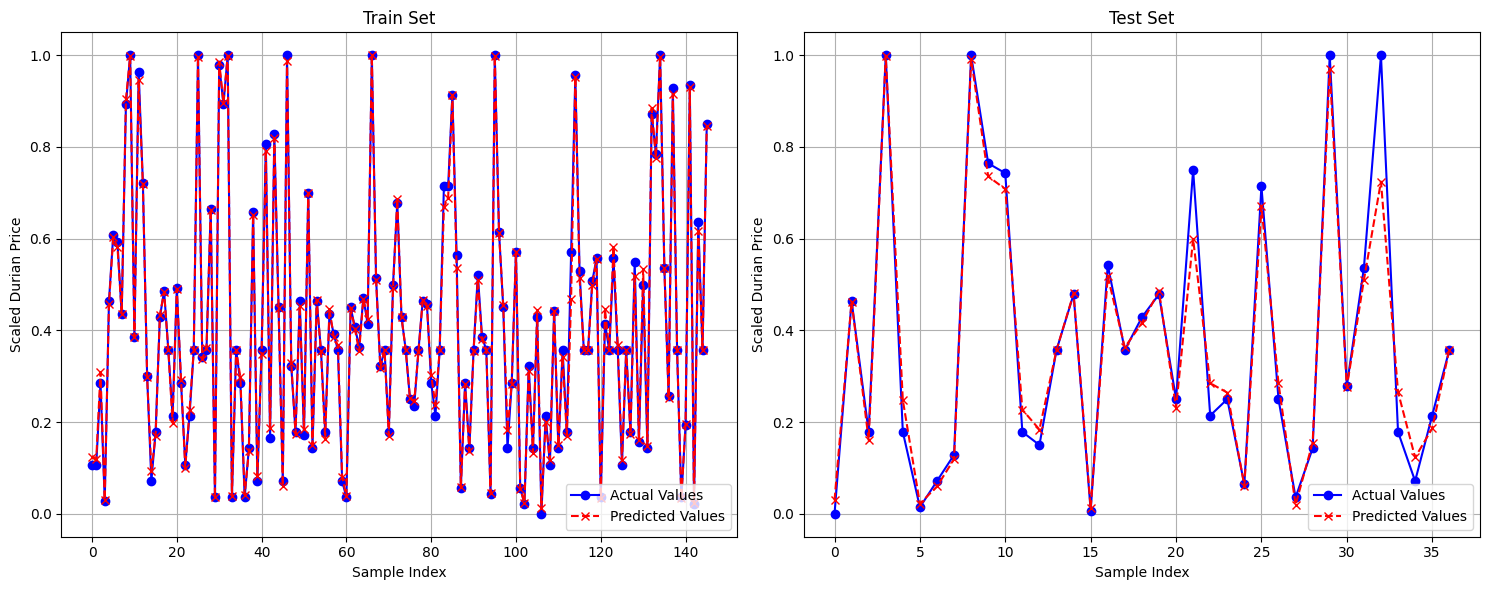

In [40]:
# สร้างโมเดล
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# คำนวณค่า R-squared ของชุดฝึกสอน
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R-squared of train set:", r2_train)

# ประเมินโมเดล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared of test set: {r2}")
print(f"Mean Squared Error: {mse}")

# สร้างกราฟเปรียบเทียบแบบ subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# สร้างกราฟเปรียบเทียบ y_train และ y_train_pred
ax1.plot(y_train, label="Actual Values", marker='o', linestyle='-', color='blue')
ax1.plot(y_train_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax1.set_title("Train Set")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Scaled Durian Price")
ax1.legend(loc='lower right')
ax1.grid(True)

# สร้างกราฟเปรียบเทียบ y_test และ y_pred
ax2.plot(y_test, label="Actual Values", marker='o', linestyle='-', color='blue')
ax2.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
ax2.set_title("Test Set")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Scaled Durian Price")
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [41]:
# ข้อมูล min และ max ของตัวแปรเป้าหมาย (y_train)
y_min = durian_price.min()
y_max = durian_price.max()

# แปลงค่ากลับจาก Min-Max Scaled เป็นค่าจริง
y_pred_original = y_pred * (y_max - y_min) + y_min
y_test_original = y_test * (y_max - y_min) + y_min

In [42]:
# แสดงผลลัพธ์ที่แปลงกลับ
df_compare = pd.DataFrame({'y_test': y_test_original, 'y_pred': y_pred_original})

# แสดงผล DataFrame
print(df_compare)

    y_test  y_pred
0    130.0  134.10
1    195.0  194.76
2    155.0  152.50
3    270.0  269.91
4    155.0  164.74
5    132.0  133.09
6    140.0  138.35
7    148.0  146.67
8    270.0  268.80
9    237.0  233.01
10   234.0  229.14
11   155.0  161.79
12   151.0  155.73
13   180.0  180.00
14   197.0  197.31
15   131.0  131.72
16   206.0  202.46
17   180.0  180.81
18   190.0  188.23
19   197.0  198.03
20   165.0  162.35
21   235.0  213.92
22   160.0  169.88
23   165.0  167.00
24   139.0  138.59
25   230.0  224.01
26   165.0  169.83
27   135.0  132.72
28   150.0  151.76
29   270.0  265.66
30   169.0  168.68
31   205.0  201.32
32   270.0  231.43
33   155.0  167.20
34   140.0  147.20
35   160.0  156.05
36   180.0  180.00


In [43]:
# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds, shuffle data
r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    first_model = RandomForestRegressor(n_estimators=100, random_state=50)
    first_model.fit(X_train, y_train)
    y_pred = first_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)

print("R-squared scores for each fold:", r2_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("MSE scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

R-squared scores for each fold: [0.9954246744374395, 0.9232537289826905, 0.9905661911349971, 0.9976231476251605, 0.9934154207808303, 0.9903506681936858, 0.9811242457133482, 0.9870188849559317, 0.937535233932022, 0.9825356645496747]
Mean R-squared: 0.9778847860305782
MSE scores for each fold: [0.00044391702470461606, 0.006652269065520936, 0.0007516941460794855, 0.0002624104308390027, 0.0005019518140589585, 0.00041262046485261304, 0.0008516709183673554, 0.0008061848072562356, 0.00279471400226757, 0.001815230442176856]
Mean MSE: 0.001529266311612363
